# Problem Solutions 

unit is expressed in mm



## Problem 1 


Find, by the use of Figure 1, the direct kinematic transformations, $T^0_4$ for the robot stylus, and $T^0_5$ for the robot camera, as function of all joint angles.

In [48]:
from visual_kinematics.RobotSerial import *
import numpy as np
import sympy as sp
import math

import RobotFunctions
from RobotController import *
import importlib
importlib.reload(RobotFunctions) # **********

<module 'RobotFunctions' from 'c:\\Users\\Ku\\Documents\\university-of-waterloo\\3B_exchange\\DTU_robotics\\Robot_Control\\34753_Robotics_Group19\\RobotFunctions.py'>

In [56]:

import RobotFunctions
threshold = 1e-8

theta1, theta2, theta3, theta4 = sp.symbols('theta1 theta2 theta3 theta4')
# Define DH parameters, with symbolic thetas
dh_params_syms = [
    [50, 0, -0.5 * pi, theta1],
    [0, 93, 0, theta2],
    [0, 93, 0, theta3],
    [0, 50, 0, theta4],
]
T = RobotFunctions.make_joint_matrices(dh_params_syms)

T_total = sp.eye(4)
for homogenous_T in T[:-1]:
    T_total = T_total @ homogenous_T
    # T_total.applyfunc(lambda x: 0 if abs(x) < 1e-8 else x)

print("Matrix T04:")
T_04 = T_total.applyfunc(lambda x: sp.nsimplify(x, tolerance=1e-10, rational=True))
sp.pretty_print(T_04.applyfunc(sp.trigsimp), use_unicode=True)

print("Matrix T05:")
T_05 = T_04 @ T[-1]
sp.pretty_print(T_total.applyfunc(sp.trigsimp), use_unicode=True)





Matrix T04:
⎡cos(θ₁)⋅cos(θ₂ + θ₃ + θ₄)  -sin(θ₂ + θ₃ + θ₄)⋅cos(θ₁)  -sin(θ₁)  (93⋅cos(θ₂)  ↪
⎢                                                                              ↪
⎢sin(θ₁)⋅cos(θ₂ + θ₃ + θ₄)  -sin(θ₁)⋅sin(θ₂ + θ₃ + θ₄)  cos(θ₁)   (93⋅cos(θ₂)  ↪
⎢                                                                              ↪
⎢   -sin(θ₂ + θ₃ + θ₄)          -cos(θ₂ + θ₃ + θ₄)         0        -93⋅sin(θ₂ ↪
⎢                                                                              ↪
⎣            0                          0                  0                   ↪

↪ + 93⋅cos(θ₂ + θ₃) + 50⋅cos(θ₂ + θ₃ + θ₄))⋅cos(θ₁)⎤
↪                                                  ⎥
↪ + 93⋅cos(θ₂ + θ₃) + 50⋅cos(θ₂ + θ₃ + θ₄))⋅sin(θ₁)⎥
↪                                                  ⎥
↪ ) - 93⋅sin(θ₂ + θ₃) - 50⋅sin(θ₂ + θ₃ + θ₄) + 50  ⎥
↪                                                  ⎥
↪                   1                              ⎦
Matrix T05:
⎡1.0⋅cos(θ₁)⋅cos(θ₂ + θ₃ + θ₄)  -1.0⋅

## problem 2 
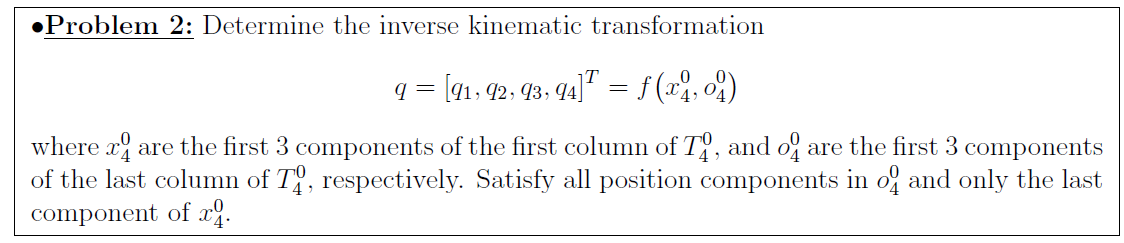

In [57]:
# inverse kinematics test
import RobotFunctions as RF
import importlib
importlib.reload(RF) # **********
xyz = np.array([[93], [50], [(93 + 50 + 25)]])
dh_params = np.array(
    [
        [50, 0, -0.5 * pi, 0],
        [0, 93, 0, 0],
        [0, 93, 0, 0],
        [0, 50, 0, 0],
    ]
)

RF.inverse(xyz, theta=0, dh_params=dh_params)

[28.26400414852393,
 -96.77255785062637,
 -10.713013147513157,
 107.48557099813952]

## Problem 3 
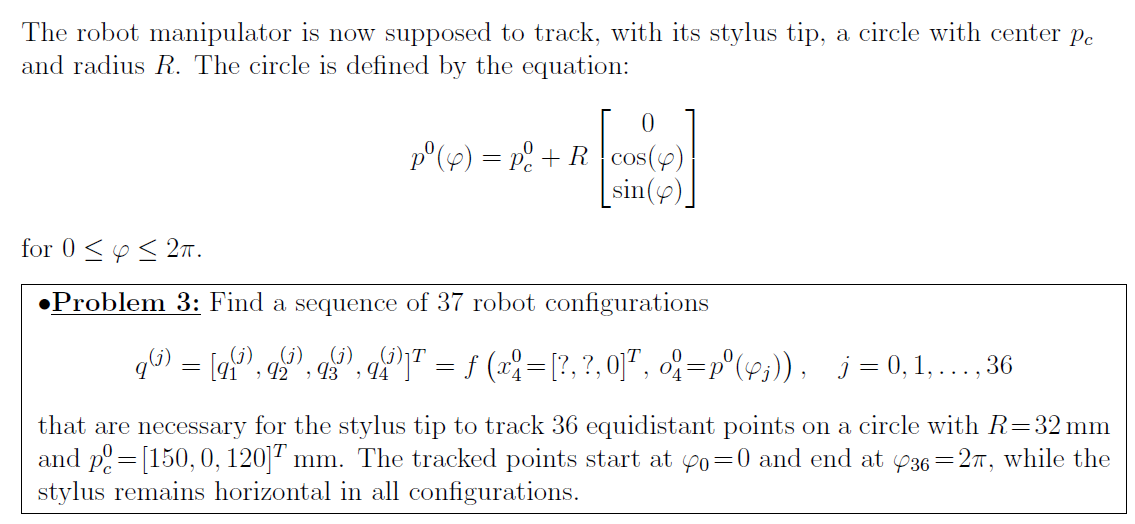

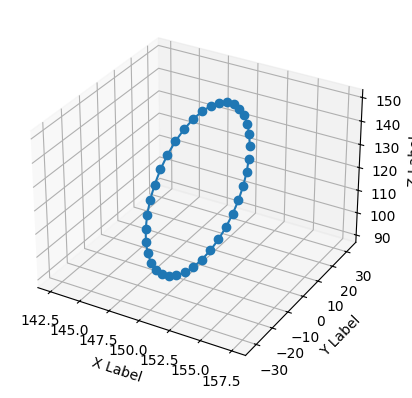

[[  12.04257514  -94.90976679  -30.39786587  125.30763266]
 [  11.87430547  -91.92521397  -27.46499999  119.39021396]
 [  11.37311952  -88.78759689  -24.56551271  113.3531096 ]
 [  10.55006526  -85.71085297  -21.78557838  107.49643135]
 [   9.42409176  -82.88642717  -19.21243785  102.09886502]
 [   8.02264767  -80.45565298  -16.93177571   97.38742868]
 [   6.38213293  -78.50309411  -15.02428799   93.52738211]
 [   4.54788645  -77.06674433  -13.5614673    90.62821163]
 [   2.57342183  -76.15561164  -12.60093726   88.7565489 ]
 [   0.51874888  -75.76657173  -12.18198522   87.94855695]
 [  -1.55217164  -75.89613372  -12.32212945   88.21826317]
 [  -3.574557    -76.54560527  -13.01548335   89.56108861]
 [  -5.48605809  -77.71936641  -14.23331246   91.95267887]
 [  -7.22964526  -79.41632423  -15.9266473    95.34297153]
 [  -8.75574124  -81.61527691  -18.03034054   99.64561745]
 [ -10.02343385  -84.25691188  -20.46773108  104.72464296]
 [ -11.00083378  -87.22870162  -23.1551468   110.3838484

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # just to enable 3D plotting

def plot_positions(positions):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = positions[:, 0]
    ys = positions[:, 1]
    zs = positions[:, 2]
    ax.plot(xs, ys, zs, marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()


def generate_position(n, radius, start_pos) -> np.ndarray:
    positions = []
    for i in range(n):
        offset = np.array([0, np.cos(i * 2 * np.pi / n), np.sin(i * 2 * np.pi / n)])
        new_pos = start_pos + radius*offset
        positions.append(new_pos)
    return np.array(positions)

final = []
# draws a circle in the xy plane, how do we account to always pen horizontal?
start_pos = np.array([150, 0, 120])
radius = 32
granularity = 37
positions = generate_position(granularity, radius, start_pos)
# list of angles
robot_config = []
for i in range(granularity):
    #print(positions[i])
    robot_config.append(RobotFunctions.inverse(positions[i].reshape(3,1), 0, dh_params))

plot_positions(positions)
robot_angle = np.array(robot_config)

print(robot_angle)



# Problem 6 
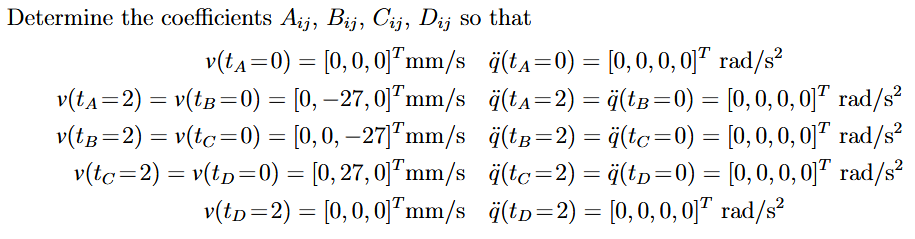
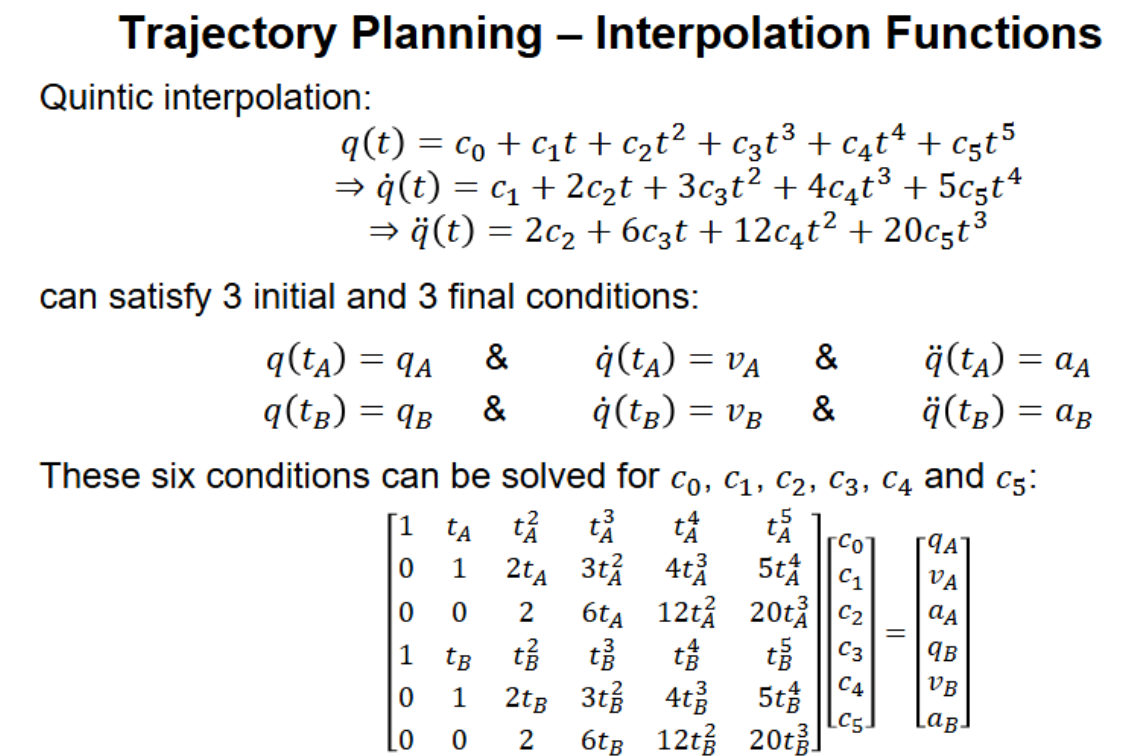

In [ ]:
# boundary parameters

v_ta = np.array([[0, 0, 0]]).T
v_tb = np.array([[0, -27, 0]]).T
q_all = np.array([[0, 0, 0]]).T

Jv = 0


q_dot = np.linalg.pinv(Jv) @ v_ta

print("Joint velocities (rad/s):", q_dot)



